# RED HOPFIELD

## Importar librerias necesarias

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Funcion de activacion

In [ ]:
def func_activacion(x):
  return 1 if x>=0 else -1

In [ ]:
func_activacion_vect = np.vectorize(func_activacion)

In [ ]:
def func_activacion(x):
  vector = [1 if val>=0 else -1 for val in x]
  return np.array(vector)

## Arquitectura RNA HOPFIELD

In [ ]:
def producto_matricial(X):
  x_entrada = X.reshape(-1,1).T # ajustar entrada
  x_transpuesta = X.reshape(-1,1) # ajustar transpuesta
  # Capa 1 -> (X_transpuesta * X)
  salida = np.dot(x_transpuesta,x_entrada)
  return salida

In [ ]:
# =============  TRAIN  ================
def RNA_hopfield(entradas):
  # generar vector para suma de matrices
  # generar una matriz de 0
  dimensiones = len(entradas[0])
  matriz_suma = np.zeros((dimensiones, dimensiones))
  # iterar para varias entradas
  for entrada_x in entradas:
    # 1. Multiplicar la transpuesta del vector por el mismo vector 
    producto = producto_matricial(entrada_x)
    # 2. Sumar los productos obtenidos
    matriz_suma = matriz_suma + np.array(producto)
  # 3. Convertir valores de la diagonal principal a 0s
  np.fill_diagonal(matriz_suma,0)
  # retornar matriz de pesos
  return matriz_suma

In [ ]:
# =========== PREDICT ===================
# 4. usar RNA
def prediccion(X_test, pesos_hopfield):
  # lista para almacenar resultados
  lista_resultados = []
  loss = []
  # 4.1 extraer y reconocer el patron X i-esimo
  for patron_x in X_test:
    flag = True
    i = 0 # acumulador de errores hasta encontrar la convergencia
    # iterar mientras no haya convergencia 
    while flag:    
      # 4.2 Multiplicar el vector del proceso anterior por la matriz de pesos
      result_prod = np.dot(patron_x,pesos_hopfield) # nxn
      # 4.3 aplicar funcion de activacion
      salida = func_activacion(result_prod)   # 1xn
      # comparar resultado con la entrada a predecir(patron)
      if (salida==patron_x).all(): # verificar si existe convergencia con la entrada anterior
        # almacenar resultados
        lista_resultados.append(salida)
        flag = False # existe convergencia
        loss.append(i+1)  
      # entrada_x_anterior
      patron_x = salida
      i+=1
  return lista_resultados, loss

## pruebas del algoritmo

In [ ]:
# ejercicio de clase
X_train = np.array([[1,1,1,-1], [-1,-1,-1,1],[-1,-1,-1,-1], [1,-1,-1,-1]])

In [ ]:
# Digitos en pixeles de 8X8 -> 1x64
X_train = np.array([[ -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1,  1, 1, 1, -1, -1, -1,
                      -1,  1,  1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1], 
                      [-1, -1, 1, 1, 1, 1, -1, -1,
                      -1, 1, -1, -1, -1, -1, 1, -1,
                      -1, -1, -1, -1, -1, -1, 1, -1,
                      -1, -1, -1, -1, -1, 1, -1, -1,
                      -1, -1, -1, -1, 1, -1, -1, -1,
                      -1, -1, -1, 1, -1, -1, -1, -1,
                      -1, -1, 1, -1, -1, -1, -1, -1,
                      -1, 1, 1, 1, 1, 1, 1, -1],
                    [-1, -1, -1, -1, -1, -1, -1, -1,
                    -1, -1, 1, 1, 1, 1, -1, -1,
                    -1, -1, -1, -1, -1, 1, -1, -1,
                    -1, -1, -1, -1, 1, 1, -1, -1,
                    -1, -1, -1, -1, -1, 1, -1, -1,
                    -1, -1, 1, 1, 1, 1, -1, -1,
                    -1, -1, -1, -1, -1, -1, -1, -1,
                    -1, -1, -1, -1, -1, -1, -1, -1],
                    [-1, -1, -1, -1, -1, 1, 1, -1,
                    -1, -1, -1, -1, 1, -1, 1, -1,
                    -1, -1, -1, 1, -1, -1, 1, -1,
                    -1, -1, 1, -1, -1, -1, 1, -1,
                    -1, 1, -1, -1, -1, -1, 1, -1,
                    1, 1, 1, 1, 1, 1, 1, 1,
                    -1, -1, -1, -1, -1, -1, 1, -1,
                    -1, -1, -1, -1, -1, -1, 1, -1],
                    [1, 1, 1, 1, 1, 1, 1, -1,
                    1, -1, -1, -1, -1, -1, -1, -1,
                    1, -1, -1, -1, -1, -1, -1, -1, 
                    1, 1, 1, 1, 1, 1, 1, -1,
                    -1, -1, -1, -1, -1, -1, 1, -1,
                    -1, -1, -1, -1, -1, -1, 1, -1,
                    1, 1, 1, 1, 1, 1, 1, -1,
                    -1, -1, -1, -1, -1, -1, -1, -1]
                    ])

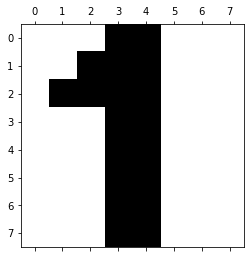

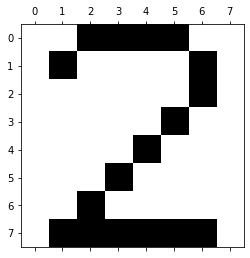

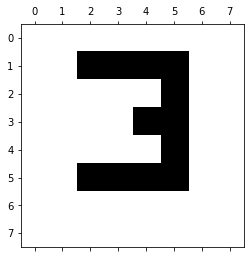

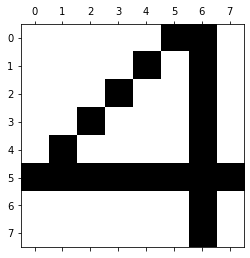

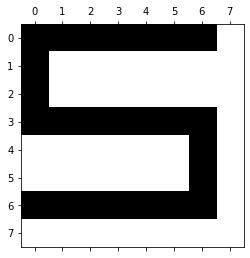

In [ ]:
# GRAFICANDO IMAGEN A PREDECIR
for i in range(5):
  plt.matshow(np.reshape(X_train[i], (-1, 8)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
# ---------------------- train -----------------------------
valores_hopfield = RNA_hopfield(X_train)
valores_hopfield

In [ ]:
X_predict = np.array([[-1,1,1,-1], [1,-1,-1,1]])

In [ ]:
X_predict = np.array([[ -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1,  1, 1, 1, -1, -1, -1,
                      -1,  1,  1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, 1, -1,
                      1, -1, -1, 1, 1, -1, -1, -1,
                      -1, -1, 1, 1, 1, -1, -1, -1,
                      -1, -1, -1, 1, 1, -1, -1, -1],
              [-1, -1, 1, -1,  1,  1, -1, -1,
              -1,  1, -1, -1, -1, -1,  1, -1,
              -1, -1,  1, -1, -1, -1,  1, -1,
              -1, -1, -1, -1, -1,  1, -1, -1,
              -1, -1, -1, -1,  1, -1, -1, -1,
              -1,  1, -1, -1, -1, -1,  1, -1,
              -1, -1,  1, -1, -1, -1, -1, -1,
              -1,  1,  1,  1,  1,  1,  1, -1],
              [1, 1, 1, 1, 1, 1, 1, -1,
              1, -1, -1, -1, -1, -1, -1, 1,
              1, -1, -1, -1, -1, -1, -1, -1, 
              1, 1, 1, 1, -1, 1, 1, -1,
              -1, -1, -1, -1, -1, -1, 1, 1,
              -1, -1, -1, -1, -1, 1, 1, -1,
              1, 1, 1, 1, 1, 1, 1, -1,
              -1, -1, -1, -1, -1, -1, -1, -1]
              ])

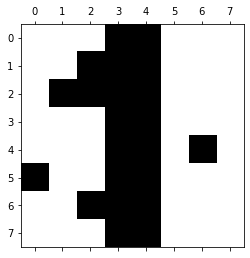

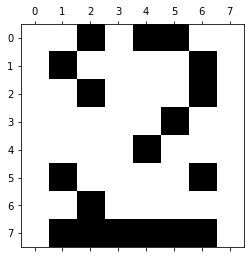

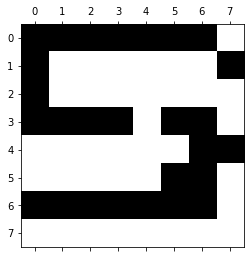

In [ ]:
# GRAFICANDO IMAGEN A PREDECIR
for i in range(3):
  plt.matshow(np.reshape(X_predict[i], (-1, 8)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
# PREDICIENDO
resultados, loss = prediccion(X_predict, valores_hopfield)

In [ ]:
resultados

[array([-1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,
         1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
        -1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
         1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1]),
 array([-1, -1,  1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
        -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
        -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
        -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1]),
 array([ 1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
        -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1,  1,
         1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1])]

In [ ]:
loss # CANTIDAD DE VECES QUE DEMORA PREDICIENDO

[2, 2, 2]

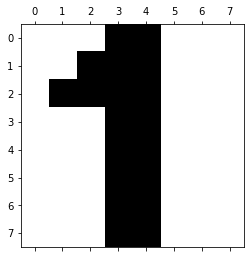

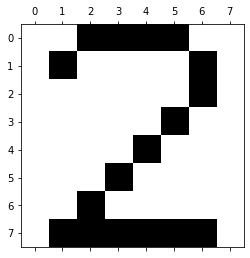

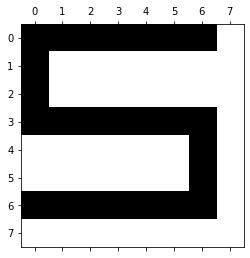

In [ ]:
for i in range(0,3):
  plt.matshow(np.reshape(resultados[i], (-1, 8)), cmap=plt.cm.binary)
  plt.show()

# CONVERTIR JPG A VECTOR

In [ ]:
import numpy as np
import pandas as pd
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
import random
from os import listdir
from os.path import isfile, isdir
from skimage import feature, data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [ ]:
# ===== OBTENER RUTA =====
def ArchivoDir(path):
    return [obj for obj in listdir(path) if isfile(path + obj)]

In [ ]:
# ==== ESTABLECER CARPETA RAIZ ====
import os
variedad = os.listdir('./digiton/')

In [ ]:
# ==== VECTORIZAR IMAGENES =======
nro_carpetas = 2
i=1
# *** Adaptacion para vectorizar varios archivos con diferentes conjuntos de imagenes 
while i < nro_carpetas: 
  Ruta = f'./digiton/conjunto{i}/'
  files = ArchivoDir(Ruta)
  # Array para almacenar datos vectorizados
  pixel =[]
  # Repetición por cada archivo de imagen
  for file in files:
      # Convertir imagen en escala de grises
      image = imread(Ruta + file, as_gray=True)
      # Reducir imagen
      image_rescaled = rescale(image, 1.0, anti_aliasing=False)
      try:
          # Obtener imagen vectorizada y etiquetada
          img  = np.reshape(image_rescaled, (50 * 71)) # (50*71)
          img = np.append(img, file)
          pixel.append(img)
      except:
          # Mostrar imagenes que NO pudieron ser reducida al 50%
          print("Error -> "+Ruta+file)
  # Convertir array de imagenes a dtaframe de pandas
  df = pd.DataFrame(pixel)

  # Grabar archivo en formato csv
  df.to_csv(f'digito_vector{i}.csv', index=False, sep=',')
  i+=1

## Corregir datasets generados

In [ ]:
digitos1 = pd.read_csv('digito_vector1.csv')

In [ ]:
# ============== LEER DATASETS =============
digitos1 = pd.read_csv('digito_vector1.csv')
digitos2 = pd.read_csv('digito_vector2.csv')
digitos3 = pd.read_csv('digito_vector3.csv')
digitos4 = pd.read_csv('digito_vector4.csv')
digitos5 = pd.read_csv('digito_vector5.csv')
digitos6 = pd.read_csv('digito_vector6.csv')
digitos7 = pd.read_csv('digito_vector7.csv')
digitos8 = pd.read_csv('digito_vector8.csv')
digitos9 = pd.read_csv('digito_vector9.csv')
digitos10 = pd.read_csv('digito_vector10.csv')

In [ ]:
digitos6

,0,1,2,3,4,5,6,7,8,9,...,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.jpg
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.jpg
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.jpg
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.jpg
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.jpg
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.jpg
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.jpg
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.jpg
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.jpg
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.jpg


## Concatenar dataframes generados

In [ ]:
# =========================== CONCATENAR DATAFRAMES ============================
df_concat = pd.concat([digitos1,digitos2,digitos3,digitos4,digitos5,digitos6,digitos7,digitos8,digitos9,digitos10], axis=0, ignore_index=True)
df_concat

## Adaptar valores del dataframe

In [ ]:
# =================== FUNCION PARA ADAPTAR VALORES DEL DF =======================
def adaptar_dataset(df, target, value_condition,identificador):
  # adaptar dataset
  df_adjusted = df.drop(target,axis=1)
  df_label = df[target]
  # cambiar valores a -1 y 1
  df_adjusted = df_adjusted.where(df_adjusted >= value_condition, -1) # los q no cumplan la condicion reemplazar por -1
  df_adjusted = df_adjusted.where(df_adjusted < value_condition, 1)
  # volver a colocar su etiqueta
  df_final = pd.concat([df_adjusted, df_label], axis=1)
  # Grabar archivo en formato csv
  df_final.to_csv(f'digito_vector{identificador}.csv', index=False, sep=',')
  return df_final

In [ ]:
df_concat = adaptar_dataset(df_concat, "3550",0.5,1) # adaptar valores

In [ ]:
digitos1 = adaptar_dataset(digitos1, "3550",0.9,1) # adaptar valores

## Guardar dataframe resultante

In [ ]:
digitos1.to_csv('digitos_test.csv', index=False, sep=',')

In [ ]:
# salvar en formato csv el dataset preprocesado
df_concat.to_csv('digitos_test.csv', index=False, sep=',')

# **DETECCION DE DIGITOS**

## Carga y comprension de los datos

### Cargar datos de entrenamiento

In [ ]:
df_digitos = pd.read_csv('digitos_train.csv')
df_digitos

,0,1,2,3,4,5,6,7,8,9,...,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.jpg
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.jpg
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.jpg
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.jpg
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.jpg
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.jpg
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.jpg
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.jpg
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.jpg
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.jpg


In [ ]:
df_digitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 3551 entries, 0 to 3550
dtypes: float64(3550), object(1)
memory usage: 277.5+ KB


In [ ]:
df_digitos.describe()

,0,1,2,3,4,5,6,7,8,9,...,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Cargar datos de prediccion

In [ ]:
df_digitos_test = pd.read_csv('digitos_test.csv')
df_digitos_test

,0,1,2,3,4,5,6,7,8,9,...,3541,3542,3543,3544,3545,3546,3547,3548,3549,3550
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.jpg
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.jpg
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9.jpg
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.jpg
4,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.jpg
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.jpg
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.jpg
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.jpg
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.jpg
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.jpg


In [ ]:
df_digitos_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Columns: 3551 entries, 0 to 3550
dtypes: float64(3550), object(1)
memory usage: 277.5+ KB


In [ ]:
df_digitos_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549
count,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,1.0,1.0,1.0,1.0,1.0,1.0,0.800000,0.800000,0.800000,0.800000,...,0.600000,0.800000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.632456,0.632456,0.632456,0.632456,...,0.843274,0.632456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,1.0,1.0,1.0,1.0,1.0,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Visualizacion de los datos

### datos de entrenamiento

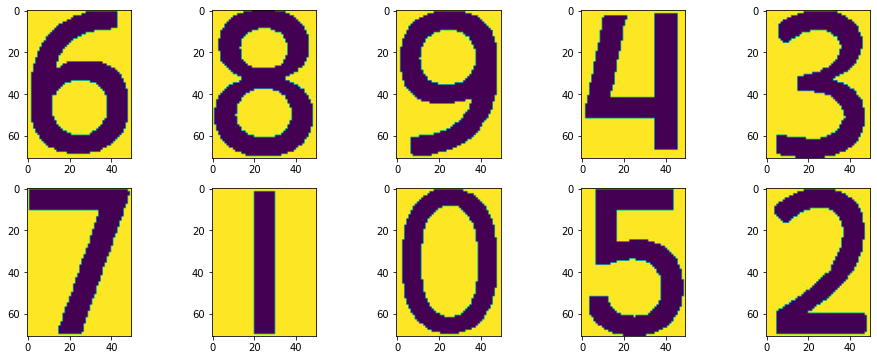

In [ ]:
# ========= GRAFICAR DATOS DE ENTRENAMIENTO =========
df_digitos_train = df_digitos.drop("3550",axis=1)
#df_digitos_train = df_digitos_train.sample(frac=1).reset_index(drop=True)
ran = df_digitos.shape[0]-1

fig, ax = plt.subplots(2, 5, figsize=(16,6))
i = -1
for k in range(2):
    for j in range(5):
        i = i + 1
        img = np.array(df_digitos_train.iloc[i].values)
        img = np.array(img).reshape(71, 50)
        ax[k,j].imshow(img)
plt.show()

In [ ]:
digitos_train = df_digitos_train.drop([1,2,7,8,9],axis=0) # 8,9,0,5,2                                                                                                                                                                                                                  

### datos de prueba

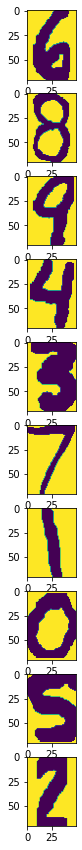

In [ ]:
# ========= GRAFICAR DATOS DE ENTRENAMIENTO =========
df_test = df_digitos_test.drop("3550",axis=1) # quitar etiqueta
# GRAFICAR
ran = df_test.shape[0]-1 # EXTRAER UNA FILA

nro_filas = 10 #6
fig, ax = plt.subplots(nro_filas, 1, figsize=(25,15))
i = -1
for k in range(nro_filas):
  i = i + 1
  img = np.array(df_test.iloc[i].values)
  img = np.array(img).reshape(71, 50)
  ax[k].imshow(img)
plt.show()

## Modelado

In [ ]:
# ======= convertir a array de numpy =======
df_train = digitos_train.to_numpy() 

## Fit

In [ ]:
# ========= Entrenar modelo ===========
valores_resultantes_hopfield = RNA_hopfield(df_train)

## Predict

In [ ]:
#test_suffled = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
# ======= convertir a array de numpy =======
df_digits_test = df_test.to_numpy() 

In [ ]:
resultados, loss = prediccion(df_digits_test, valores_resultantes_hopfield)

In [ ]:
df_predict = pd.DataFrame(resultados)
df_predict

,0,1,2,3,4,5,6,7,8,9,...,3540,3541,3542,3543,3544,3545,3546,3547,3548,3549
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


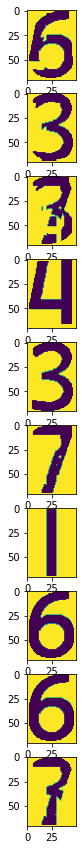

In [ ]:
#df_test = df_predict.drop("3000",axis=1) # quitar etiqueta

# GRAFICAR
ran = df_predict.shape[0]-1 # EXTRAER UNA FILA

nro_filas = 10 #6
fig, ax = plt.subplots(nro_filas, 1, figsize=(20,15))
i = -1
for k in range(nro_filas):
  i = i + 1
  img = np.array(df_predict.iloc[i].values)
  img = np.array(img).reshape(71, 50)
  ax[k].imshow(img)
plt.show()

# DETECCION DE VOCALES

In [ ]:
df_AIU_train = pd.read_csv('AIU-train.csv')
df_AIU_train

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,1,1,1,1,-1,1,1,1,1,1,-1,1
1,1,1,1,-1,1,-1,-1,1,-1,1,1,1
2,1,-1,1,1,-1,1,1,-1,1,1,1,1


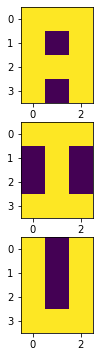

In [ ]:
# ========= GRAFICAR DATOS DE ENTRENAMIENTO =========
fig, ax = plt.subplots(3, 1, figsize=(16,6))
i = -1
for k in range(3):
  i = i + 1
  img = np.array(df_AIU_train.iloc[i].values)
  img = np.array(img).reshape(4, 3)
  ax[k].imshow(img)
plt.show()

In [ ]:
df_AIU_test = pd.read_csv('AIU-predict.csv')
df_AIU_test

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12
0,1,1,1,1,-1,-1,1,1,1,1,-1,1
1,1,1,1,-1,1,-1,-1,1,-1,1,1,-1
2,1,-1,-1,1,-1,1,1,-1,1,1,1,1


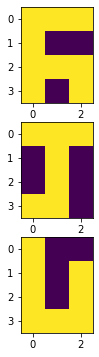

In [ ]:
# ========= GRAFICAR DATOS DE ENTRENAMIENTO =========
fig, ax = plt.subplots(3, 1, figsize=(16,6))
i = -1
for k in range(3):
  i = i + 1
  img = np.array(df_AIU_test.iloc[i].values)
  img = np.array(img).reshape(4, 3)
  ax[k].imshow(img)
plt.show()

In [ ]:
# ======= convertir a array de numpy =======
df_train = df_AIU_train.to_numpy() 

In [ ]:
valores_resultantes_hopfield = RNA_hopfield(df_train)

In [ ]:
df_digits_test = df_AIU_test.to_numpy() 
resultados, loss = prediccion(df_digits_test, valores_resultantes_hopfield)
df_predict = pd.DataFrame(resultados)
df_predict

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,-1,1,1,1,1,1,-1,1
1,1,1,1,-1,1,-1,-1,1,-1,1,1,1
2,1,-1,1,1,-1,1,1,-1,1,1,1,1


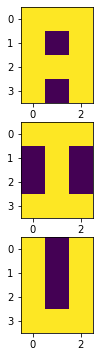

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(16,6))
i = -1
for k in range(3):
  i = i + 1
  img = np.array(df_predict.iloc[i].values)
  img = np.array(img).reshape(4, 3)
  ax[k].imshow(img)
plt.show()